In [1]:
import pandas as pd
import nltk
import re
import numpy as np
emails = pd.read_csv("../../hillary_emails.csv")

In [5]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'[a-z]+') # or just '\w+, this dumps numbers too
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)

emails.testBody = emails.ExtractedBodyText.apply(lambda x: str(x)).apply(lambda x: preprocess(x))

In [7]:
emails.testBody

0                                                     nan
1       b thursday march pm h latest syria aiding qadd...
2                                                     thx
3                                                     nan
4       h hrod clintonemail com friday march pm huma a...
5       pis print h hrod clintonernailcom wednesday se...
6                                                     nan
7       h hrod clintonemail corn friday march pm huma ...
8                                                     fyi
9       b wednesday september pm fwd libya libya sept ...
10                                                  fyi b
11      b wednesday september pm fwd libya libya sept ...
12                                                    fyi
13      anne marie slaughter sunday march pm jacob mil...
14      randolph lawrence m sent wednesday september p...
15      asked attend svtc today embassy tripoli first ...
16                           hope see picture kamala sent
17            

In [9]:
from textblob import TextBlob
tags_test = []
for x in range(10):
    tags_test.append(TextBlob(emails.testBody[x]).tags)

[[('nan', u'NN')],
 [('b', u'NN'),
  ('thursday', u'NN'),
  ('march', u'NN'),
  ('pm', u'NN'),
  ('h', u'NN'),
  ('latest', u'JJS'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('qaddafi', u'JJ'),
  ('sid', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'JJ'),
  ('march', u'NN'),
  ('hillary', u'NN')],
 [('thx', u'NN')],
 [('nan', u'NN')],
 [('h', u'NN'),
  ('hrod', u'NN'),
  ('clintonemail', u'NN'),
  ('com', u'NN'),
  ('friday', u'JJ'),
  ('march', u'NN'),
  ('pm', u'NN'),
  ('huma', u'NN'),
  ('abedin', u'NN'),
  ('fw', u'NN'),
  ('h', u'NN'),
  ('latest', u'JJS'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('qaddafi', u'JJ'),
  ('sid', u'NN'),
  ('hrc', u'NN'),
  ('memo', u'NN'),
  ('syria', u'NN'),
  ('aiding', u'VBG'),
  ('libya', u'JJ'),
  ('docx', u'NN'),
  ('pis', u'NN'),
  ('print', u'NN'

In [38]:
type(emails.ExtractedBodyText[1]) == str

True

In [130]:
# Floats cant be put through textblob, must convert to str (hashed line doesnt' work)
type(emails.ExtractedBodyText[0])
# blob = TextBlob(emails.ExtractedBodyText[0])
blob = TextBlob(str(emails.ExtractedBodyText[0]))
blob

TextBlob("nan")

In [127]:
# Some strings have weird unicode, must decode first
type(emails.ExtractedBodyText[5])
blob = TextBlob(emails.ExtractedBodyText[5].decode('utf-8'))
blob

TextBlob("Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045251")

In [98]:
# make blobs and sentiments
blobs = []
sentiments = []
for x in range(len(emails.ExtractedBodyText)):
    if type(emails.ExtractedBodyText[x]) != float:
        content = emails.ExtractedBodyText[x].decode('utf-8')
    else:
        content = str(emails.ExtractedBodyText[x])
    blob = TextBlob(content)
    blobs.append(blob)
    sentiments.append(blob.sentiment.polarity)

In [102]:
# add sentiment and blob columns
emails['sentiments'] = sentiments
emails['blobs'] = blobs

In [ ]:
# test column
emails.blobs[1]

In [120]:
# test blob function in column
emails.blobs[1].tags

[(u'B6', u'NNP'),
 (u'Thursday', u'NNP'),
 (u'March', u'NNP'),
 (u'3', u'CD'),
 (u'2011', u'CD'),
 (u'9:45', u'CD'),
 (u'PM', u'NNP'),
 (u'H', u'NNP'),
 (u'Latest', u'NNP'),
 (u'How', u'NNP'),
 (u'Syria', u'NNP'),
 (u'is', u'VBZ'),
 (u'aiding', u'VBG'),
 (u'Qaddafi', u'NNP'),
 (u'and', u'CC'),
 (u'more', u'JJR'),
 (u'Sid', u'NNP'),
 (u'hrc', u'VBD'),
 (u'memo', u'NN'),
 (u'syria', u'NN'),
 (u'aiding', u'VBG'),
 (u'libya', u'JJ'),
 (u'030311.docx', u'CD'),
 (u'hrc', u'NN'),
 (u'memo', u'NN'),
 (u'syria', u'NN'),
 (u'aiding', u'VBG'),
 (u'libya', u'JJ'),
 (u'030311.docx', u'CD'),
 (u'March', u'NNP'),
 (u'3', u'CD'),
 (u'2011', u'CD'),
 (u'For', u'IN'),
 (u'Hillary', u'JJ')]

In [133]:
emails.to_csv('emails_sentiment.csv')

In [134]:
pd.read_csv('emails_sentiment.csv')

,Unnamed: 0,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,sentiments,blobs
0,0,1,C05739545,WOW,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,0.000000,NaN
1,1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,0.500000,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,0.000000,Thx
3,3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,...,"Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,0.000000,NaN
4,4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,...,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,0.500000,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
5,5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,...,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,-0.143452,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
6,6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,...,NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,0.000000,NaN
7,7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,...,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,0.500000,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
8,8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,...,NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...,0.000000,FYI
9,9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,...,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...,0.300000,"B6\nWednesday, Septem

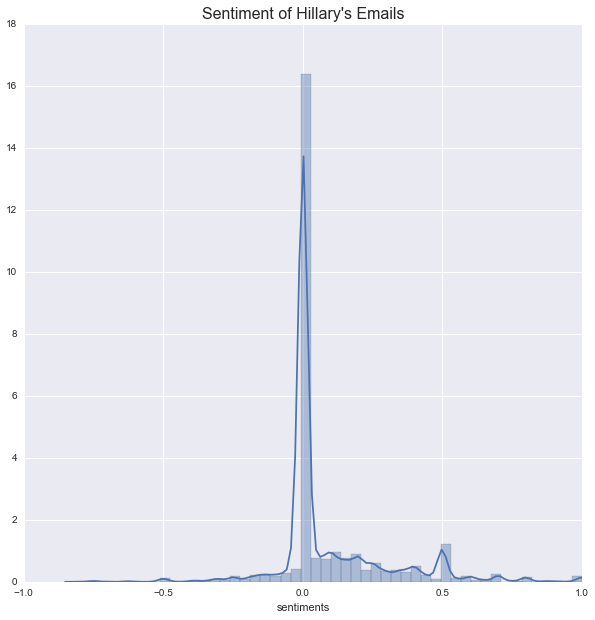

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))

sns.distplot(emails.sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\'s Emails', fontsize = 16)

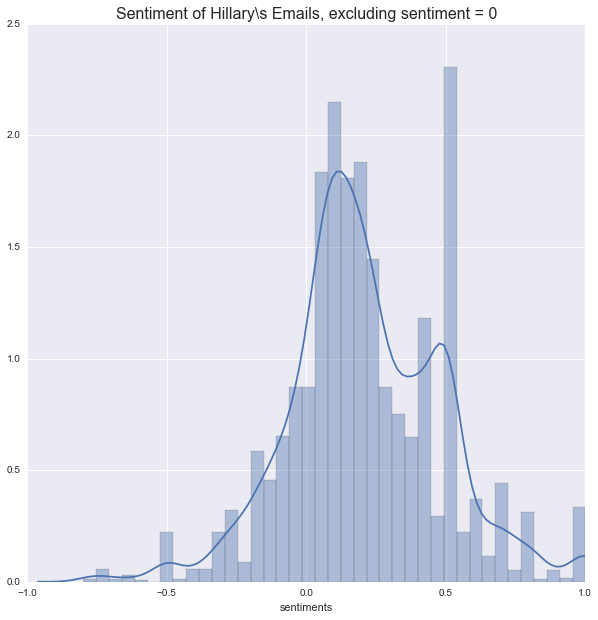

In [171]:
plt.figure(figsize=(10, 10))

sns.distplot(emails[(emails.sentiments > 0) | (emails.sentiments < 0)].sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\s Emails, excluding sentiment = 0', fontsize = 16)

In [160]:
# Emails that don't have sentiment = 0
len(emails[(emails.sentiments > 0) | (emails.sentiments < 0)])

3375